In [1]:
# import
import requests
import json
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
# Function for CryptoCompare HistoMinute API request

def get_histominute_data(exchange):
    url = 'https://min-api.cryptocompare.com/data/histominute?fsym=BTC&tsym=USD&limit=1440&aggregate=1&e={}'
    response = requests.post(url.format(exchange))
    data = json.loads(response.content)
    df = pd.DataFrame.from_dict(data["Data"], orient="columns")
    
    return pd.DataFrame(df)

In [7]:
# get data for each exchange
exchange_data = {}
exchanges = ['GDAX', 'BITSTAMP', 'GEMINI', 'OKCOIN', 'KRAKEN']
for exchange in exchanges:
    exchange_data[exchange] = get_histominute_data(exchange)


In [11]:
exchange_data['GEMINI'].head()

,close,high,low,open,time,volumefrom,volumeto
0,6549.43,6549.44,6549.43,6549.43,1510676880,3.55000,23261.53
1,6546.52,6549.44,6546.52,6549.43,1510676940,7.93000,51918.16
2,6546.52,6546.52,6546.52,6546.52,1510677000,5.00000,32732.67
3,6546.45,6546.52,6546.45,6546.52,1510677060,0.72710,4759.68
4,6546.46,6546.46,6546.45,6546.45,1510677120,0.07927,518.95


In [12]:
# Function to merge dataframes into a single dataframe
def merge_dfs_on_column(dataframes, labels, col):
    '''Merge a single column of each dataframe into a new combined dataframe'''
    series_dict = {}
    for index in range(len(dataframes)):
        series_dict[labels[index]] = dataframes[index][col]
        
    return pd.DataFrame(series_dict)

In [13]:
btc_usd_datasets = merge_dfs_on_column(list(exchange_data.values()), list(exchange_data.keys()), 'close')

In [14]:
btc_usd_datasets.head()

,BITSTAMP,GDAX,GEMINI,KRAKEN,OKCOIN
0,6552.83,6551.14,6549.43,6609.0,6629.34
1,6552.21,6555.78,6546.52,6608.5,6687.11
2,6540.54,6552.00,6546.52,6595.7,6636.12
3,6542.24,6552.01,6546.45,6609.7,6636.57
4,6541.49,6552.01,6546.46,6596.8,6636.57


In [20]:
# Function to merge dataframes into a single dataframe
def merge_dfs_on_column2(dataframes, labels, col):
    '''Merge a single column of each dataframe into a new combined dataframe'''
    series_dict = {}
    
    
    for index in range(len(dataframes)):
        index = index + "_VOLUME"
        series_dict[labels[index]] = dataframes[index][col]
        
    return pd.DataFrame(series_dict)

In [15]:
btc_usd_volumes = merge_dfs_on_column(list(exchange_data.values()), list(exchange_data.keys()), 'volumefrom')

In [18]:
# Concat two dataframe colme-wise
df = pd.concat([btc_usd_datasets,btc_usd_volumes],axis=1).copy()

In [23]:
btc_usd_volumes.head()

,BITSTAMP,GDAX,GEMINI,KRAKEN,OKCOIN
0,3.0200,15.64,3.55000,0.514500,0.3592
1,3.8400,5.89,7.93000,1.940000,0.0200
2,4.6400,12.65,5.00000,4.320000,0.0510
3,0.9595,8.85,0.72710,2.490000,0.0200
4,1.0300,7.74,0.07927,0.003717,0.0000


In [28]:
# Calculate Weighted Price by volumefrom
v1 = btc_usd_datasets.copy()
v2 = btc_usd_volumes.copy()
df = pd.DataFrame(v1 * v2, index=v1.index, columns=['BITSTAMP', 'GDAX', 'GEMINI', 'KRAKEN', 'OKCOIN'])

In [32]:
df.tail()

,BITSTAMP,GDAX,GEMINI,KRAKEN
1436,565568.4000,235863.3285,79713.8391,29457.6000
1437,86321.3896,503642.2312,352970.7664,60883.2000
1438,80782.2000,416952.0000,85788.9000,34097.2800
1439,86982.1337,411543.6831,53671.9500,31190.4000
1440,0.0000,9987.1361,11187.4152,2261.5502


In [41]:
# Remove any rows with 0
dfnew = df.loc[(df.T!=0.0000).any()]

In [42]:
dfnew.tail()

,BITSTAMP,GDAX,GEMINI,KRAKEN
1436,565568.4000,235863.3285,79713.8391,29457.6000
1437,86321.3896,503642.2312,352970.7664,60883.2000
1438,80782.2000,416952.0000,85788.9000,34097.2800
1439,86982.1337,411543.6831,53671.9500,31190.4000
1440,0.0000,9987.1361,11187.4152,2261.5502


In [60]:
avg = 0;

for exchange in exchanges:
    avg =  avg + btc_usd_datasets[exchange]
    
avg = avg/len(btc_usd_datasets.columns)

In [47]:
# Add 'Average' price into the dataframe
btc_usd_datasets['AVG']=avg

In [58]:
avg

1       6590.024
2       6574.176
3       6577.394
4       6574.666
5       6579.578
6       6579.558
7       6596.668
8       6593.340
9       6599.216
10      6613.268
11      6616.332
12      6621.302
13      6623.722
14      6614.020
15      6619.676
16      6634.994
17      6629.446
18      6645.468
19      6627.086
20      6625.544
21      6621.220
22      6621.828
23      6621.746
24      6632.556
25      6608.376
26      6612.926
27      6633.632
28      6630.788
29      6634.022
30      6632.510
          ...   
1411    8843.372
1412    8842.962
1413    8838.290
1414    8830.650
1415    8825.806
1416    8815.344
1417    8828.862
1418    8823.352
1419    8830.826
1420    8821.808
1421    8828.112
1422    8819.956
1423    8825.488
1424    8823.252
1425    8820.006
1426    8822.466
1427    8819.558
1428    8829.948
1429    8825.502
1430    8818.668
1431    8814.262
1432    8813.710
1433    8804.800
1434    8790.686
1435    8779.322
1436    8774.616
1437    8790.260
1438    8788.1

In [48]:
# Add DateTime Column
btc_usd_datasets["DATE"] = exchange_data['BITSTAMP']['time']
btc_usd_datasets['DATE'] = pd.to_datetime(btc_usd_datasets['DATE'],unit='s')

In [49]:
df = btc_usd_datasets.copy()
df.head()

,BITSTAMP,GDAX,GEMINI,KRAKEN,OKCOIN,AVG,DATE
0,6552.83,6551.14,6549.43,6609.0,6629.34,6578.348,2017-11-14 16:28:00
1,6552.21,6555.78,6546.52,6608.5,6687.11,6590.024,2017-11-14 16:29:00
2,6540.54,6552.00,6546.52,6595.7,6636.12,6574.176,2017-11-14 16:30:00
3,6542.24,6552.01,6546.45,6609.7,6636.57,6577.394,2017-11-14 16:31:00
4,6541.49,6552.01,6546.46,6596.8,6636.57,6574.666,2017-11-14 16:32:00


In [52]:
# Remove OKCoin, Too many unreasonable price data. 
df = df.loc[:,df.columns!='OKCOIN']

In [59]:
df.head()

,BITSTAMP,GDAX,GEMINI,KRAKEN,AVG,DATE
0,6552.83,6551.14,6549.43,6609.0,6578.348,2017-11-14 16:28:00
1,6552.21,6555.78,6546.52,6608.5,6590.024,2017-11-14 16:29:00
2,6540.54,6552.00,6546.52,6595.7,6574.176,2017-11-14 16:30:00
3,6542.24,6552.01,6546.45,6609.7,6577.394,2017-11-14 16:31:00
4,6541.49,6552.01,6546.46,6596.8,6574.666,2017-11-14 16:32:00


In [84]:
exchanges = ['BITSTAMP','GDAX','GEMINI','KRAKEN']


In [102]:
errors = {}
for exchange in exchanges:
    errors[exchange] = 0

for i in range(1,1440):
    for exchange in exchanges:
        errors[exchange] = errors[exchange] + df.loc[i+1,'AVG']-df.loc[i,exchange]

In [103]:
errors

{'BITSTAMP': 1613861.1700000009,
 'GDAX': 1609529.5400000017,
 'GEMINI': 1613283.7400000009,
 'KRAKEN': 1578252.4500000025}

In [104]:
exchanges

['BITSTAMP', 'GDAX', 'GEMINI', 'KRAKEN']

In [105]:
for exchange in exchanges:
    errors[exchange] = errors[exchange]/1441

In [108]:
errors

# MSE Dictionary to Dataframe
df_errors = pd.DataFrame.from_dict(errors, orient='index')

In [115]:
df_errors = df_errors.rename(columns={0:'error'})

In [191]:
max_value = df_errors['error'].max()
min_value = df_errors['error'].min()
df_errors['normError']=(df_errors['error'] - min_value) / (max_value - min_value)
df_errors

,error,normError
BITSTAMP,1119.959174,1.000000
GDAX,1116.953185,0.878355
GEMINI,1119.558459,0.983784
KRAKEN,1095.248057,0.000000


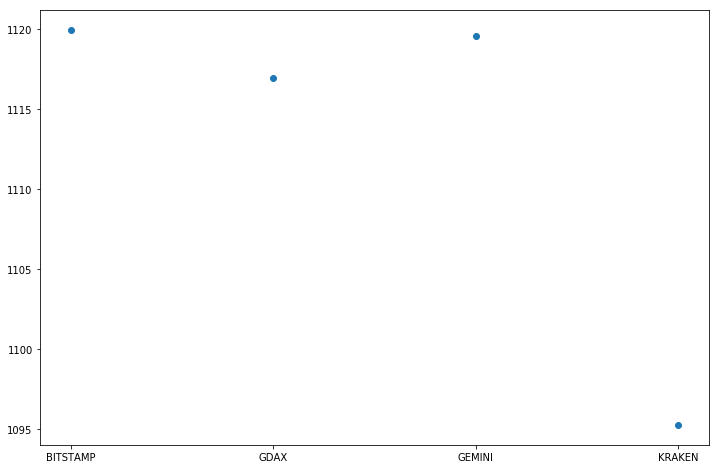

In [193]:
# Error visualisation for original price prediction
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)

plt.scatter(df_errors.index, df_errors['error'])

In [217]:
# Create dataframe for volume weighted price
df_price = btc_usd_datasets.loc[:,df_weighted_price.columns!='AVG']

In [218]:
df_price.head()

,BITSTAMP,GDAX,GEMINI,KRAKEN
0,6552.83,6551.14,6549.43,6609.0
1,6552.21,6555.78,6546.52,6608.5
2,6540.54,6552.00,6546.52,6595.7
3,6542.24,6552.01,6546.45,6609.7
4,6541.49,6552.01,6546.46,6596.8


In [182]:
#df_norm_price = df_norm_price.div(df_norm_price.sum(axis=1), axis=0)

In [219]:
# Create Dataframe for weighted standardised volume
df_volumes = btc_usd_volumes.loc[:,btc_usd_volumes.columns!='OKCOIN']
df_volumes.head()

,BITSTAMP,GDAX,GEMINI,KRAKEN
0,3.0200,15.64,3.55000,0.514500
1,3.8400,5.89,7.93000,1.940000
2,4.6400,12.65,5.00000,4.320000
3,0.9595,8.85,0.72710,2.490000
4,1.0300,7.74,0.07927,0.003717


In [242]:
df_volumes.sum(axis=0)

BITSTAMP    16286.623195
GDAX        23708.094300
GEMINI       9313.247733
KRAKEN       6255.541405
dtype: float64

In [220]:
df_volumes.sum(axis=0)

BITSTAMP    16286.623195
GDAX        23708.094300
GEMINI       9313.247733
KRAKEN       6255.541405
dtype: float64

In [221]:
v1 = df_price
v2 = df_volumes
df = pd.DataFrame(v1 * v2, index=v1.index, columns=['BITSTAMP', 'GDAX', 'GEMINI', 'KRAKEN', ])

In [222]:
# df = price * volume
df.head()

,BITSTAMP,GDAX,GEMINI,KRAKEN
0,19789.54660,102459.8296,23250.476500,3400.330500
1,25160.48640,38613.5442,51913.903600,12820.490000
2,30348.10560,82882.8000,32732.600000,28493.424000
3,6277.27928,57985.2885,4759.923795,16458.153000
4,6737.73470,50712.5574,518.937884,24.520306


In [236]:
# Volume Weighted Price for each exchange
vwp = df.sum(axis=0)/df_volumes.sum(axis=0)

In [232]:
average_price = df_price.sum(axis=1)/4
average_volume = df_volumes.sum(axis=1)/4

In [237]:
#Average Volume Weighted Price
avwp = sum(average_price*average_volume)/sum(average_volume)

In [243]:
volume_weighted_price_error = abs(vwp-avwp)

In [253]:
volume_weighted_price_error

BITSTAMP     9.397488
GDAX         5.284567
GEMINI      26.255398
KRAKEN      58.161461
dtype: float64

In [254]:
# MSE Dictionary to Dataframe
df_errors2 = pd.DataFrame(volume_weighted_price_error)
df_errors2 = df_errors2.rename(columns={0:'error'})

In [255]:
df_errors2

,error
BITSTAMP,9.397488
GDAX,5.284567
GEMINI,26.255398
KRAKEN,58.161461


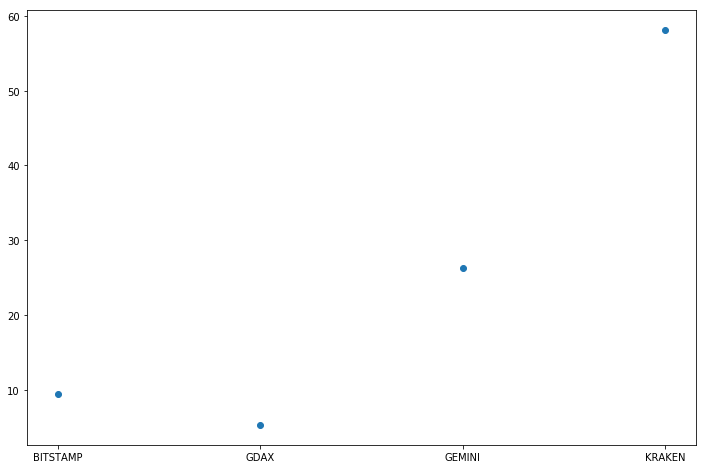

In [257]:
# Error visualisation for original price prediction
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)

plt.scatter(df_errors2.index, df_errors2['error'])